# Acquire

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wrangle
import prepare
import acquire
import env
from sklearn.model_selection import train_test_split
from scipy import stats
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=acquire.zillow_data()
df.head(5).T

,0,1,2,3,4
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,4.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,2962.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0
yearbuilt,1998.0,1967.0,1962.0,1970.0,1950.0
taxvaluedollarcnt,1023282.0,464000.0,564778.0,145143.0,773303.0


In [3]:
df.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips',
       'yearbuilt', 'taxvaluedollarcnt'],
      dtype='object')

From the scope of what is wanted I have adjusted my SQL query to recieve 52442 rows. So now that we have the information then what? Now we dropp what we do not need. Since there are many differing features to choose from it would be easier to finds what has the most impact. I am going to choose:
- bedroomcnt
- bathroomcnt
- calculatedfinishedsquarefeet
- taxvaluedollarcnt
- yearbuilt
- fips
>The rest can be dropped off for further investigation for the time being these are enough leads to get me going

# Prepare

In [4]:
# df = df.drop(columns=["parcelid",
#                  "id",
#                  "airconditioningtypeid",
#                  "architecturalstyletypeid",
#                  "basementsqft",
#                 "buildingclasstypeid",
#                 "buildingqualitytypeid",
#                 "calculatedbathnbr",
#                 "decktypeid",
#                 "finishedfloor1squarefeet",
#                 'finishedsquarefeet12', 
#                  'finishedsquarefeet13', 
#                  'finishedsquarefeet15',
#                'finishedsquarefeet50', 
#                  'finishedsquarefeet6', 
#                   'fireplacecnt',
#                    'fullbathcnt', 
#                  'garagecarcnt',
#                  'garagetotalsqft',
#                  'hashottuborspa',
#                    'heatingorsystemtypeid', 
#                  'latitude', 
#                  'longitude', 
#                  'lotsizesquarefeet',
#                    'poolcnt', 
#                  'poolsizesum', 
#                  'pooltypeid10', 
#                  'pooltypeid2', 
#                  'pooltypeid7',
#                    'propertycountylandusecode',
#                  'propertylandusetypeid',
#                    'propertyzoningdesc',
#                  'rawcensustractandblock',
#                  'regionidcity',
#                    'regionidcounty', 
#                  'regionidneighborhood',
#                  'regionidzip',
#                  'roomcnt',
#                    'storytypeid', 
#                  'threequarterbathnbr',
#                  'typeconstructiontypeid',
#                    'unitcnt', 
#                  'yardbuildingsqft17',
#                  'yardbuildingsqft26',
#                    'numberofstories', 
#                  'fireplaceflag',
#                  'structuretaxvaluedollarcnt',
#                  'assessmentyear', 
#                  'landtaxvaluedollarcnt',
#                    'taxamount', 
#                  'taxdelinquencyflag', 
#                  'taxdelinquencyyear',
#                    'censustractandblock', 
#                  'id', 
#                  'logerror', 
#                  'transactiondate'])

In [5]:
df.head(5)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt
0,3.5,4.0,3100.0,6059.0,1998.0,1023282.0
1,1.0,2.0,1465.0,6111.0,1967.0,464000.0
2,2.0,3.0,1243.0,6059.0,1962.0,564778.0
3,3.0,4.0,2376.0,6037.0,1970.0,145143.0
4,3.0,4.0,2962.0,6037.0,1950.0,773303.0


In [6]:
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
yearbuilt                       0
taxvaluedollarcnt               0
dtype: int64

There are a decent amount 
OR I can kick it under the fridge like an ice cube

If not will impute with median year built

# Prepare

What next? the information has already been train

In [7]:
df = prepare.wrangled_zillow(df)
df.head(5)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt
0,3.5,4.0,3100.0,6059.0,1998.0,1023282.0
1,1.0,2.0,1465.0,6111.0,1967.0,464000.0
2,2.0,3.0,1243.0,6059.0,1962.0,564778.0
3,3.0,4.0,2376.0,6037.0,1970.0,145143.0
4,3.0,4.0,2962.0,6037.0,1950.0,773303.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50724 entries, 0 to 50723
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   50724 non-null  float64
 1   bedroomcnt                    50724 non-null  float64
 2   calculatedfinishedsquarefeet  50724 non-null  float64
 3   fips                          50724 non-null  float64
 4   yearbuilt                     50724 non-null  float64
 5   taxvaluedollarcnt             50724 non-null  float64
dtypes: float64(6)
memory usage: 2.7 MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,50724.0,2.234051,0.897408,1.0,2.0,2.0,3.0,6.0
bedroomcnt,50724.0,3.272987,0.889970,1.0,3.0,3.0,4.0,6.0
calculatedfinishedsquarefeet,50724.0,1844.269103,824.676285,152.0,1258.0,1635.0,2238.0,8615.0
fips,50724.0,6049.176800,21.093083,6037.0,6037.0,6037.0,6059.0,6111.0
yearbuilt,50724.0,1963.087020,22.824787,1878.0,1950.0,1960.0,1978.0,2016.0
taxvaluedollarcnt,50724.0,444192.690955,353853.540931,1000.0,188567.0,363754.5,588816.5,1997251.0


# Train, Test, Validate

From here we can scale, which will be needed in this format to model

In [10]:
def traintestsplit(df):
    #this function gives us train validate test variabels to model with
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.fips)
    #80% of value
    #I choose to stratify here to get an even mix of counties to not miss trends and clearly see if the taxvaluedollarcount is in fact evenly set on  counties
    #TL:DR keeping counties even in sample
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.fips)
    # 30% of 80% for validate and test
    return train, validate, test

In [11]:
train, validate, test = traintestsplit(df)
train, validate, test

(       bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet    fips  \
 26274          2.0         4.0                        1770.0  6059.0   
 32524          1.0         2.0                        1326.0  6037.0   
 19029          2.0         3.0                        2540.0  6037.0   
 39945          3.0         3.0                        2222.0  6037.0   
 24739          2.0         3.0                        1605.0  6037.0   
 ...            ...         ...                           ...     ...   
 41307          2.5         4.0                        2489.0  6059.0   
 14084          1.0         3.0                        1224.0  6037.0   
 20947          3.0         5.0                        2447.0  6037.0   
 4859           3.0         3.0                        1463.0  6037.0   
 31937          2.5         4.0                        2479.0  6059.0   
 
        yearbuilt  taxvaluedollarcnt  
 26274     1962.0           435025.0  
 32524     1951.0           292396.0  
 1902

## Explore
### we explore off of trian data set

#### Graphing

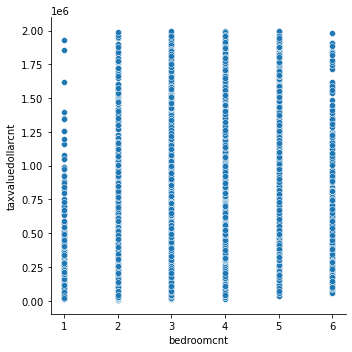

In [12]:
sns.relplot(x="bedroomcnt", y="taxvaluedollarcnt", data=train)
plt.show()
#wow i made A graph :D

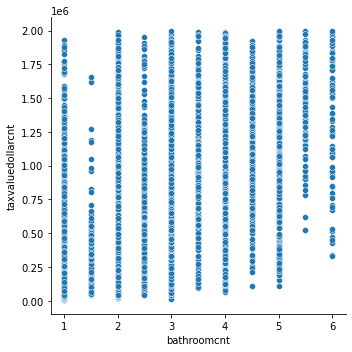

In [13]:
sns.relplot(x="bathroomcnt", y="taxvaluedollarcnt", data=train)
plt.show()

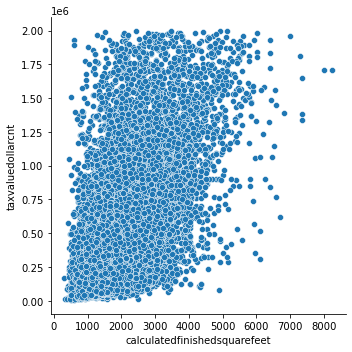

In [14]:
sns.relplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt", data=train)
plt.show()

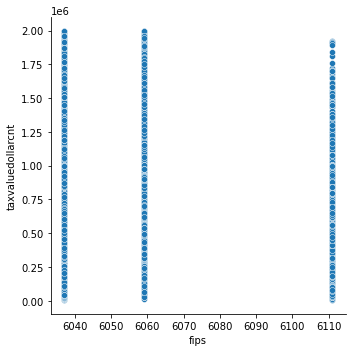

In [15]:
sns.relplot(x="fips", y="taxvaluedollarcnt", data=train)
plt.show()

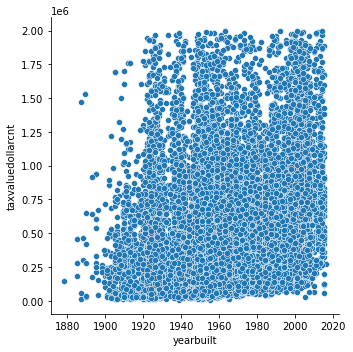

In [16]:
sns.relplot(x="yearbuilt", y="taxvaluedollarcnt", data=train)
plt.show()

<b>
    Current takeaway being that "calculatedfinishedsquarefeet" has the most signal
</b>

## the above graphs are mostly inconclusive

<hr>

## best graphs

In [17]:
α = 0.05

> α = 0.05

correlation test here I come, or pearson's R

<p><b>Hypothesis:</b>
That the number of bedrooms has a positive relationship to the house price</p>

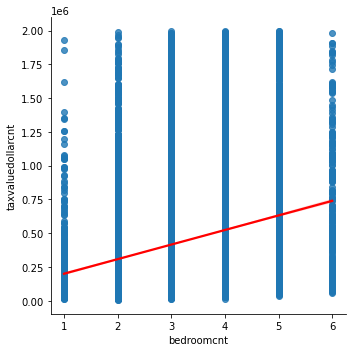

In [18]:
sns.lmplot(x="bedroomcnt", y="taxvaluedollarcnt", data=train, line_kws={'color': 'red'})
plt.show()

Roughly a small linear relationship between bedroom count and "price"

In [19]:
corr, p = stats.pearsonr(train.bedroomcnt, train.taxvaluedollarcnt)
corr, p

(0.26998459281241166, 0.0)

In [20]:
if α > p:
    print("We reject the null hypothesis")

We reject the null hypothesis


What the statistical test tells us here is that there is in fact a relationship between the amount of bedrooms and the price of the house. It also tells us that while being meaningful there maybe stronger drivers to measure against

<hr>

<p><b>Hypothesis:</b>
The amount of bathrooms has a positive relationship to the house price</p>

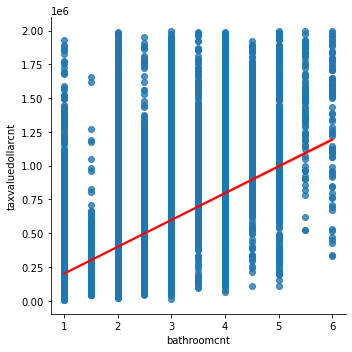

In [21]:
sns.lmplot(x="bathroomcnt", y="taxvaluedollarcnt", data=train, line_kws={'color': 'red'})
plt.show()
#steeper slope here can imply higher causality towards "price"

In [22]:
corr, p = stats.pearsonr(train.bathroomcnt, train.taxvaluedollarcnt)
corr, p

(0.5005506051404705, 0.0)

What the statistical data above shows us is that there is a positive relationship between number of bathrooms and price. More over that the significance is quite high

<hr>

<p><b>Hypothesis:</b>
The calculatedfinishedsquarefeet has a positive relationship to the house price</p>

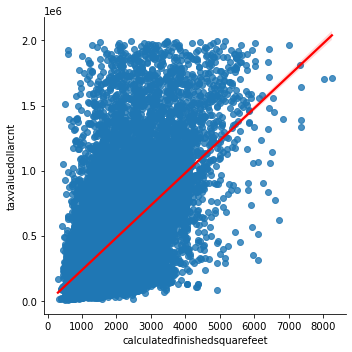

In [23]:
sns.lmplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt", data=train, line_kws={'color': 'red'})
plt.show()
#most 45 degree ish line so far
#tell about relationship as well as hypotheses and stats test with correlation test

In [24]:
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
corr, p

(0.5721633427826447, 0.0)

What the statistical data above shows us is that there is a positive relationship between how much square feet there are and price. More over that the significance is quite high

<hr>

<p><b>Hypothesis:</b>
The county code has a positive relationship to the house price</p>

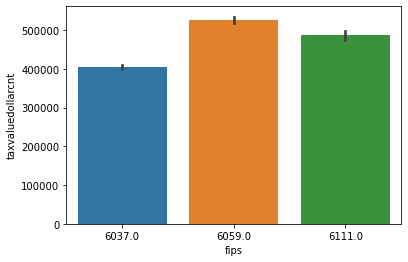

In [25]:
#For this one we have swapped from lmplot to a bar plot because it yeilds cleaner answers
sns.barplot(x="fips", y="taxvaluedollarcnt", data=train)
plt.show()
#we explore off of train
#really hammer home

In [26]:
t, p = stats.ttest_ind(train[train['fips'] == 6059.0].taxvaluedollarcnt,
                       train[train['fips']== 6111.0].taxvaluedollarcnt, 
                       equal_var=False)
t, p / 2
#correlation here are two series
#running two t tests here
#compare series to series

(5.328882585666712, 5.171424318304606e-08)

In [27]:
t, p = stats.ttest_ind(train[train['fips'] == 6111.0].taxvaluedollarcnt,
                       train[train['fips'] == 6037.0].taxvaluedollarcnt, 
                       equal_var=False)
t, p / 2

(11.844959063238885, 5.05423419246211e-32)

<b>What the above statistical test tells us is that there are differences in prices of houses between counties.
    
Between Orange County(6059) Los Angelos(6111) there is some difference
    
But between Los Angelos(6111) and Ventura County(6059) there is an even greater difference </b>

The relationship present here implies that the county of 6059 has a higher on average cost

<p><b>Hypothesis:</b>
The year built has a positive relationship to the house price</p>

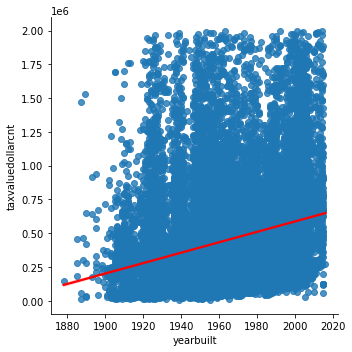

In [28]:
sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", data=train, line_kws={'color': 'red'})
plt.show()
#this takeaway shows us that year  may not be the most poperful prediction
#the realtionship between 

Takeaways:
- calculated square feet is so far the lead in realtionship to "price

In [29]:
corr, p = stats.pearsonr(train.yearbuilt, train.taxvaluedollarcnt)
corr, p

(0.2479012725902783, 0.0)

What the statistical data above shows us is that there is a positive relationship between the year it was built and price. More over that the significance is not so strong

<hr>

# Scalers

In [30]:
from scipy import stats
import sklearn.preprocessing

In [31]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt
26274,2.0,4.0,1770.0,6059.0,1962.0,435025.0
32524,1.0,2.0,1326.0,6037.0,1951.0,292396.0
19029,2.0,3.0,2540.0,6037.0,1924.0,177234.0
39945,3.0,3.0,2222.0,6037.0,1949.0,254176.0
24739,2.0,3.0,1605.0,6037.0,1950.0,293620.0


## Min Max Scaler

Text(0.5, 1.0, 'Scaled')

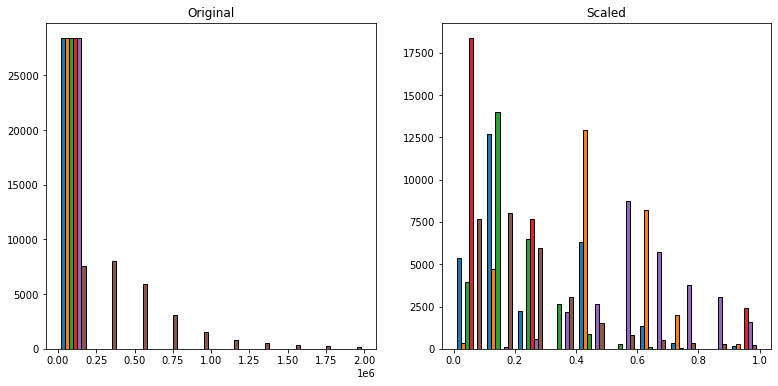

In [32]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

x_train_scaled = scaler.transform(train)
x_validate_scaled = scaler.transform(validate)
x_test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=10, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=10, ec='black')
plt.title('Scaled')
#has the most change in outliers

In [33]:
x_train_and_validate, x_test = train_test_split(train)
x_train, x_validate = train_test_split(x_train_and_validate)

In [34]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt
26274,2.0,4.0,1770.0,6059.0,1962.0,435025.0
32524,1.0,2.0,1326.0,6037.0,1951.0,292396.0
19029,2.0,3.0,2540.0,6037.0,1924.0,177234.0
39945,3.0,3.0,2222.0,6037.0,1949.0,254176.0
24739,2.0,3.0,1605.0,6037.0,1950.0,293620.0


In [35]:
pd.DataFrame(x_train_scaled)
#not what we want but a step in the right direction
#we typically scale one feature at a time

,0,1,2,3,4,5
0,0.2,0.6,0.184882,0.297297,0.608696,0.216535
1,0.0,0.2,0.129040,0.000000,0.528986,0.145006
2,0.2,0.4,0.281726,0.000000,0.333333,0.087252
3,0.4,0.4,0.241731,0.000000,0.514493,0.125839
4,0.2,0.4,0.164130,0.000000,0.521739,0.145620
...,...,...,...,...,...,...
28400,0.3,0.6,0.275311,0.297297,0.630435,0.052435
28401,0.0,0.4,0.116212,0.000000,0.492754,0.099747
28402,0.4,0.8,0.270029,0.000000,0.666667,0.160709
28403,0.4,0.4,0.146271,0.000000,0.797101,0.162783


## Standard  Scaler

Text(0.5, 1.0, 'Scaled')

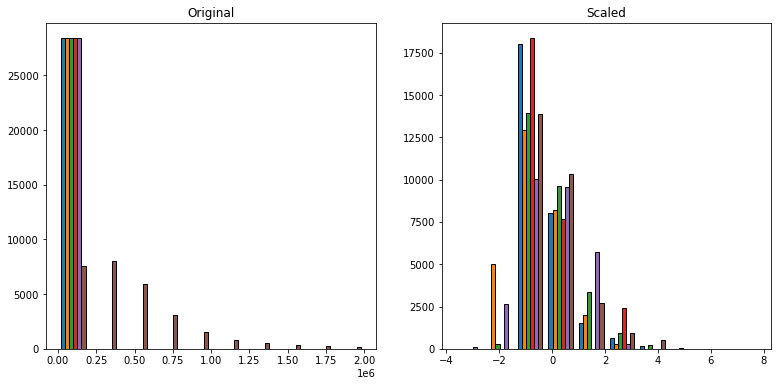

In [36]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

x_train_scaled = scaler.transform(train)
x_validate_scaled = scaler.transform(validate)
x_test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=10, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=10, ec='black')
plt.title('Scaled')

## Robust Scaler

Text(0.5, 1.0, 'Scaled')

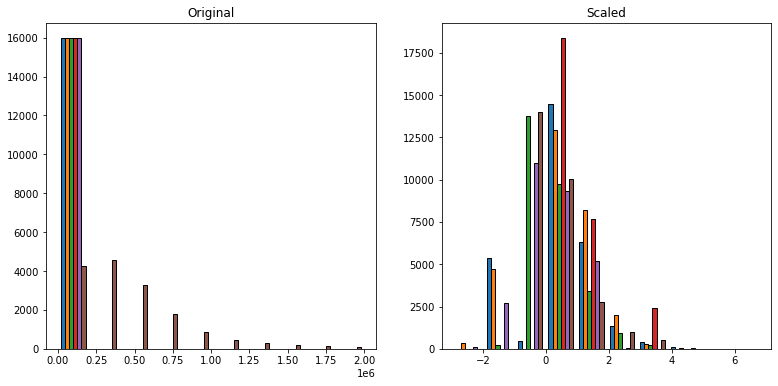

In [37]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

x_train_scaled = scaler.transform(train)
x_validate_scaled = scaler.transform(validate)
x_test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=10, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=10, ec='black')
plt.title('Scaled')

Takeaways:
- That there are some visual changes to the layout of the graphs but is due to bins

## Wokring with scaled data

In [38]:
#what am I doing here?
# I am testing out how to work with scaled data
X_train = train[['calculatedfinishedsquarefeet']]
y_train = train['taxvaluedollarcnt']

X_validate = validate[['calculatedfinishedsquarefeet']]
y_validate = validate['taxvaluedollarcnt']

X_test = test[['calculatedfinishedsquarefeet']]
y_test = test['taxvaluedollarcnt']

In [39]:
y_test.head()

3967     411828.0
32361     16722.0
14938    233022.0
9557     865466.0
6691     465988.0
Name: taxvaluedollarcnt, dtype: float64

In [40]:
X_train

,calculatedfinishedsquarefeet
26274,1770.0
32524,1326.0
19029,2540.0
39945,2222.0
24739,1605.0
...,...
41307,2489.0
14084,1224.0
20947,2447.0
4859,1463.0


In [41]:
#need baseline RMSE
#take the average or median
#and compare the RMSE

In [42]:
baseline = train.taxvaluedollarcnt.mean()
baseline

444749.31364196446

In [43]:
train['baseline'] = train.taxvaluedollarcnt.mean()
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,baseline
26274,2.0,4.0,1770.0,6059.0,1962.0,435025.0,444749.313642
32524,1.0,2.0,1326.0,6037.0,1951.0,292396.0,444749.313642
19029,2.0,3.0,2540.0,6037.0,1924.0,177234.0,444749.313642
39945,3.0,3.0,2222.0,6037.0,1949.0,254176.0,444749.313642
24739,2.0,3.0,1605.0,6037.0,1950.0,293620.0,444749.313642


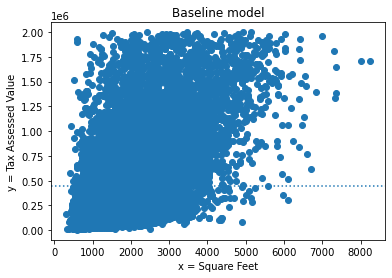

In [44]:
#plotting against the mean of the data
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.axhline(train.taxvaluedollarcnt.mean(), ls = ':')
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('Baseline model');

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [47]:
train['yhat'] = predictions

In [48]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,baseline,yhat
26274,2.0,4.0,1770.0,6059.0,1962.0,435025.0,444749.313642,427905.123037
32524,1.0,2.0,1326.0,6037.0,1951.0,292396.0,444749.313642,317515.321687
19029,2.0,3.0,2540.0,6037.0,1924.0,177234.0,444749.313642,619346.895648
39945,3.0,3.0,2222.0,6037.0,1949.0,254176.0,444749.313642,540283.929817
24739,2.0,3.0,1605.0,6037.0,1950.0,293620.0,444749.313642,386881.886049


In [49]:
train.shape

(28405, 8)

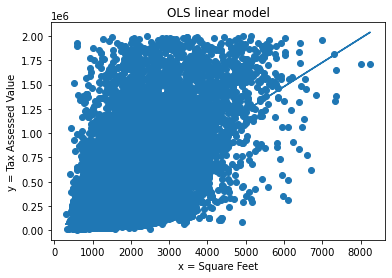

In [50]:
# visualize the line of best fit from OLS linear model
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.plot(train.calculatedfinishedsquarefeet, train.yhat)
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('OLS linear model');

# Modeling

This may take some time, maybe more time then I know of.

My confidence is not the highest coming into this but I will surely build out some models

In [51]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [52]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(train.taxvaluedollarcnt)
y_validate = pd.DataFrame(validate.taxvaluedollarcnt)

# 1. Predict price_pred_mean
price_pred_mean = y_train['taxvaluedollarcnt'].mean()
y_train['price_pred_mean'] = price_pred_mean
y_validate['price_pred_mean'] = price_pred_mean

# 2. compute price_pred_median
price_pred_median = y_train['taxvaluedollarcnt'].median()
y_train['price_pred_median'] = price_pred_median
y_validate['price_pred_median'] = price_pred_median

# 3. RMSE of price_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.price_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.price_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.price_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.price_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  355302.21 
Validate/Out-of-Sample:  351801.88
RMSE using Median
Train/In-Sample:  364345.33 
Validate/Out-of-Sample:  361109.96


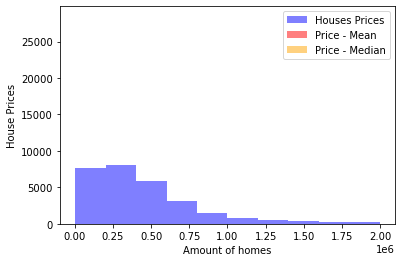

In [53]:
plt.hist(y_train.taxvaluedollarcnt, color='blue', alpha=.5, label="Houses Prices")
plt.hist(y_train.price_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Price - Mean")
plt.hist(y_train.price_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Price - Median")
plt.xlabel("Amount of homes")
plt.ylabel("House Prices")
plt.legend()
plt.show()

In [54]:
#scales my data
def scaler_min_max(df, col_list):
    #scaled_col_name = [col_name + "_scaled" for col_name in col_list]
    #creates a datafrmae from my columns
    df_2 = df[col_list]
    # What to alias this to be able to add column with different name
    df = df.drop(columns = col_list)
    #then it will drop the columns I've inputed as arguements
    scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(df_2)
    #create scaler object "minmaxscaler here"
    df_2 = pd.DataFrame(scaler.transform(df_2), columns=df_2.columns.values).set_index([df_2.index.values])
    #apply  scaler object to dataframe using my columns I inputed
    df = df.join(df_2)
    #adding column back to original dataframe
    return df

Commenting styles differe from poeple and places

In [55]:
z = scaler_min_max(train, ["calculatedfinishedsquarefeet"])
z

,bathroomcnt,bedroomcnt,fips,yearbuilt,taxvaluedollarcnt,baseline,yhat,calculatedfinishedsquarefeet
26274,2.0,4.0,6059.0,1962.0,435025.0,444749.313642,427905.123037,0.184882
32524,1.0,2.0,6037.0,1951.0,292396.0,444749.313642,317515.321687,0.129040
19029,2.0,3.0,6037.0,1924.0,177234.0,444749.313642,619346.895648,0.281726
39945,3.0,3.0,6037.0,1949.0,254176.0,444749.313642,540283.929817,0.241731
24739,2.0,3.0,6037.0,1950.0,293620.0,444749.313642,386881.886049,0.164130
...,...,...,...,...,...,...,...,...
41307,2.5,4.0,6059.0,1965.0,107810.0,444749.313642,606666.986034,0.275311
14084,1.0,3.0,6037.0,1946.0,202149.0,444749.313642,292155.502458,0.116212
20947,3.0,5.0,6037.0,1970.0,323707.0,444749.313642,596224.707528,0.270029
4859,3.0,3.0,6037.0,1988.0,327843.0,444749.313642,351577.039671,0.146271


In [56]:
z = z.drop(columns=["bathroomcnt","bedroomcnt","fips","yearbuilt","baseline","yhat","taxvaluedollarcnt"])
z

,calculatedfinishedsquarefeet
26274,0.184882
32524,0.129040
19029,0.281726
39945,0.241731
24739,0.164130
...,...
41307,0.275311
14084,0.116212
20947,0.270029
4859,0.146271


In [57]:
train["scaled_squarefeet"] = z
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,baseline,yhat,scaled_squarefeet
26274,2.0,4.0,1770.0,6059.0,1962.0,435025.0,444749.313642,427905.123037,0.184882
32524,1.0,2.0,1326.0,6037.0,1951.0,292396.0,444749.313642,317515.321687,0.129040
19029,2.0,3.0,2540.0,6037.0,1924.0,177234.0,444749.313642,619346.895648,0.281726
39945,3.0,3.0,2222.0,6037.0,1949.0,254176.0,444749.313642,540283.929817,0.241731
24739,2.0,3.0,1605.0,6037.0,1950.0,293620.0,444749.313642,386881.886049,0.164130
...,...,...,...,...,...,...,...,...,...
41307,2.5,4.0,2489.0,6059.0,1965.0,107810.0,444749.313642,606666.986034,0.275311
14084,1.0,3.0,1224.0,6037.0,1946.0,202149.0,444749.313642,292155.502458,0.116212
20947,3.0,5.0,2447.0,6037.0,1970.0,323707.0,444749.313642,596224.707528,0.270029
4859,3.0,3.0,1463.0,6037.0,1988.0,327843.0,444749.313642,351577.039671,0.146271


In [58]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,baseline,yhat,scaled_squarefeet
26274,2.0,4.0,1770.0,6059.0,1962.0,435025.0,444749.313642,427905.123037,0.184882
32524,1.0,2.0,1326.0,6037.0,1951.0,292396.0,444749.313642,317515.321687,0.129040
19029,2.0,3.0,2540.0,6037.0,1924.0,177234.0,444749.313642,619346.895648,0.281726
39945,3.0,3.0,2222.0,6037.0,1949.0,254176.0,444749.313642,540283.929817,0.241731
24739,2.0,3.0,1605.0,6037.0,1950.0,293620.0,444749.313642,386881.886049,0.164130


Target variables usually don't have to be scaled

We scale for the machine so that the machince can easily read out the data

So that it sees them as a change in one to a change equal to another

I am going to try to model the data now that I have some scaled stuff

In [59]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(train.taxvaluedollarcnt)
y_validate = pd.DataFrame(validate.taxvaluedollarcnt)

# 1. Predict price_pred_mean
price_pred_mean = y_train['taxvaluedollarcnt'].mean()
y_train['price_pred_mean'] = price_pred_mean
y_validate['price_pred_mean'] = price_pred_mean

# 2. compute price_pred_median
price_pred_median = y_train['taxvaluedollarcnt'].median()
y_train['price_pred_median'] = price_pred_median
y_validate['price_pred_median'] = price_pred_median

# 3. RMSE of price_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.price_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.price_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of price_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.price_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.price_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2),
     "\nOrigincal baseline:", round(baseline, 2))

RMSE using Mean
Train/In-Sample:  355302.21 
Validate/Out-of-Sample:  351801.88
RMSE using Median
Train/In-Sample:  364345.33 
Validate/Out-of-Sample:  361109.96 
Origincal baseline: 444749.31


In [60]:
X_train.head()

,calculatedfinishedsquarefeet
26274,1770.0
32524,1326.0
19029,2540.0
39945,2222.0
24739,1605.0


In [61]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['price_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.price_pred_lm)**(1/2)

# predict validate
y_validate['price_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.price_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  291397.4447750423 
Validation/Out-of-Sample:  288308.6220619157


In [62]:
X_validate.head()

,calculatedfinishedsquarefeet
39322,1585.0
22723,2556.0
279,1815.0
15798,1565.0
37822,3326.0


In [63]:
X_train.shape

(28405, 1)

In [64]:
X_validate.shape

(12174, 1)

In [65]:
z.shape
#this tells us that z is already test split

(28405, 1)

In [66]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(z, y_train.taxvaluedollarcnt)

# predict train
y_train['price_pred_lm'] = lm.predict(z)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.price_pred_lm)**(1/2)

# predict validate
y_validate['price_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.price_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  291397.4447750423 
Validation/Out-of-Sample:  4030897268.7623267


In [67]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [68]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [69]:
train_scaled

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,baseline,yhat,scaled_squarefeet
26274,0.2,0.6,0.184882,6059.0,0.608696,435025.0,444749.313642,427905.123037,0.184882
32524,0.0,0.2,0.129040,6037.0,0.528986,292396.0,444749.313642,317515.321687,0.129040
19029,0.2,0.4,0.281726,6037.0,0.333333,177234.0,444749.313642,619346.895648,0.281726
39945,0.4,0.4,0.241731,6037.0,0.514493,254176.0,444749.313642,540283.929817,0.241731
24739,0.2,0.4,0.164130,6037.0,0.521739,293620.0,444749.313642,386881.886049,0.164130
...,...,...,...,...,...,...,...,...,...
41307,0.3,0.6,0.275311,6059.0,0.630435,107810.0,444749.313642,606666.986034,0.275311
14084,0.0,0.4,0.116212,6037.0,0.492754,202149.0,444749.313642,292155.502458,0.116212
20947,0.4,0.8,0.270029,6037.0,0.666667,323707.0,444749.313642,596224.707528,0.270029
4859,0.4,0.4,0.146271,6037.0,0.797101,327843.0,444749.313642,351577.039671,0.146271


So now I have all of my features scaled apart from year and taxvaluedollar.

Now with all of my features scaled to a MinMaxScaler I can now run models on it.

I am going to want to split my features from target variable

In [70]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(train.taxvaluedollarcnt)
y_validate = pd.DataFrame(validate.taxvaluedollarcnt)

# 1. Predict price_pred_mean
price_pred_mean = y_train['taxvaluedollarcnt'].mean()
y_train['price_pred_mean'] = price_pred_mean
y_validate['price_pred_mean'] = price_pred_mean

# 2. compute price_pred_median
price_pred_median = y_train['taxvaluedollarcnt'].median()
y_train['price_pred_median'] = price_pred_median
y_validate['price_pred_median'] = price_pred_median

# 3. RMSE of price_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.price_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.price_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of price_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.price_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.price_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2),
     "\nOrigincal baseline:", round(baseline, 2))

RMSE using Mean
Train/In-Sample:  355302.21 
Validate/Out-of-Sample:  351801.88
RMSE using Median
Train/In-Sample:  364345.33 
Validate/Out-of-Sample:  361109.96 
Origincal baseline: 444749.31


In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
#predicting y from trained data
#predict rules
model = LinearRegression().fit(train_scaled, train.taxvaluedollarcnt)
predictions = model.predict(train_scaled)

In [73]:
#need error reading such as RMSE

From here it would be best practice

In [76]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['G3_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.G3_pred_lm)**(1/2)

# predict validate
y_validate['G3_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.G3_pred_lm)**(1/2)

# predict test
y_test['G3_pred_lm'] = lm.predict(X_test)

rmse_test = mean_squared_error(y_test.taxvaluedollarcnt, y_test.G3_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate,
     "\nRoomatoid arthritis:", rmse_test)

AttributeError: 'Series' object has no attribute 'taxvaluedollarcnt'

In [75]:
pd.DataFrame(y_test)

,taxvaluedollarcnt
3967,411828.0
32361,16722.0
14938,233022.0
9557,865466.0
6691,465988.0
...,...
23684,421585.0
25367,1034780.0
43771,479587.0
38763,201136.0


Pick best model, run all models then choose 1 from there, the chosen one gets the test data set

In [ ]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['G3_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.G3_pred_glm)**(1/2)

# predict validate
y_validate['G3_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.G3_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

# Evaluate

Of the three machine learning models we have used Linear Regression and Lasso Lars are about the same

I would suggest we use the linear regression model to guide the project forward

### now can run it against the test data set to determine final accuracy

I have damn near all of my material and models read is there achnace that I can fix this using the time I have left?

I mean its gonna suck ass if i try to slide it in by the morning. The good news is that practically everything i need is here. I just gotta add and delete a couple more items

Give it a test run for presentation then build out my README which is  gonna end up being last